In [1]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty.aws
compthink
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


In [ ]:
https://scipython.com/book/chapter-8-scipy/examples/weighted-and-non-weighted-least-squares-fitting/

# Weighted Least Squares

Consider our last lesson where we used linear algebra to construct OLS regressions

$\mathbf{X^T}\mathbf{Y}=\mathbf{X^T}\mathbf{X}\mathbf{\beta}$ 

If we were to insert an identy matrix (1s on the diagonal, 0s elsewhere) we could write:

$\mathbf{X^T}\mathbf{I}\mathbf{Y}=\mathbf{X^T}\mathbf{I}\mathbf{X}\mathbf{\beta}$  and there is no change.


https://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html

In [3]:
# copy/adapted from https://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html


from __future__ import print_function
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

In [10]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[int(nsample * 6/10):] = 3
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
X = X[:,[0,1]]


In [11]:
mod_wls = sm.WLS(y, X, weights=1./w)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            WLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     261.7
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           4.60e-21
Time:                        13:06:05   Log-Likelihood:                -74.160
No. Observations:                  50   AIC:                             152.3
Df Residuals:                      48   BIC:                             156.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0796      0.261     19.491      0.0

In [12]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)

[5.21012987 0.42246007]
[5.07958361 0.45159799]


In [13]:
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb,X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, res_ols.df_resid)

In [14]:
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)

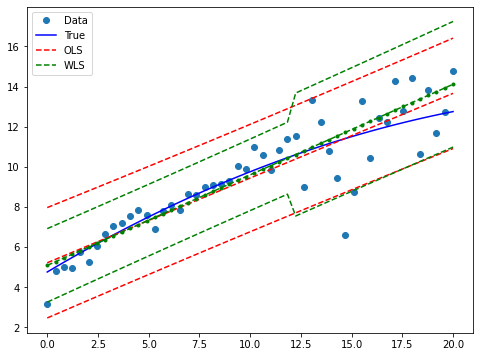

In [15]:
prstd, iv_l, iv_u = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_u, 'g--', label="WLS")
ax.plot(x, iv_l, 'g--')
ax.legend(loc="best");

In [16]:
resid1 = res_ols.resid[w==1.]
var1 = resid1.var(ddof=int(res_ols.df_model)+1)
resid2 = res_ols.resid[w!=1.]
var2 = resid2.var(ddof=int(res_ols.df_model)+1)
w_est = w.copy()
w_est[w!=1.] = np.sqrt(var2) / np.sqrt(var1)
res_fwls = sm.WLS(y, X, 1./w_est).fit()
print(res_fwls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            WLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     253.8
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           8.51e-21
Time:                        13:07:55   Log-Likelihood:                -74.830
No. Observations:                  50   AIC:                             153.7
Df Residuals:                      48   BIC:                             157.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0946      0.267     19.052      0.0

https://en.wikipedia.org/wiki/Weighted_least_squares

https://scipython.com/book/chapter-8-scipy/examples/weighted-and-non-weighted-least-squares-fitting/